# 적응형 선형 뉴런(ADAptive LInear NEuron, ADALINE)

## 기존의 퍼셉트론과 차이점
- 기존의 퍼셉트론은 가중치를 갱신하는 데 단위 계단 함수를 사용
- ADALINE은 가중치를 갱신하는 데 선형 활성화 함수를 사용

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [2]:
class AdalineGD(object):
    """
    Perceptron classifier
    
    __________
    eta : float
        학습률 (0.0 ~ 1.0 사이의 값)
    n_iter : int
        훈련 dataset 반복 횟수
    random_state : int
        가중치 무작위 초기화를 위한 난수 생성기 seed
    
    __________
    w_ : 1d-array
        학습된 가중치
    cost_ : list
        epcoh마다 누적된 비용 함수의 제곱합
    
    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    
    def fit(self, X, y):
        """
        Training
        
        __________
        X : {array-like}, shape = [n_samples, n_features]
            n_samples개의 sample과 n_features개의 특징으로 이루어진 train data
        y : array-like, shape = [n_samples]
            target 값
        
        __________
        self : object
        
        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1]) #mean이 0, deviation이 0.01
        
        self.cost_ = []
        
        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = y - output
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self
    
    def net_input(self, X):
        """최종 입력 계산"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self, X):
        """선형 활성화 계산"""
        return X
    
    def predict(self, X):
        """단위 계단 함수를 이용하여 class label 반환"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [3]:
def plot_decision_regions(X, y, classifier, resolution=0.02):
    
    markers = ('s','o','x','^','v')
    colors = ('red','blue','lightgreen','gray','cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=colors[idx], marker=markers[idx], label=cl, edgecolor='black')

In [4]:
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

X = df.iloc[0:100, [0, 2]].values

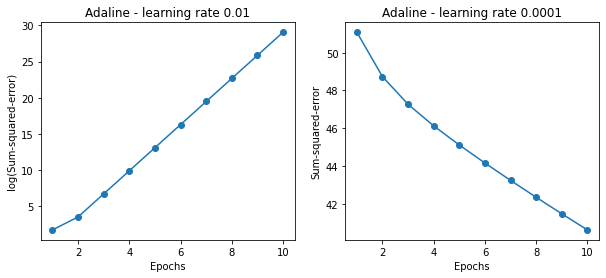

In [6]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X, y)
ax[0].plot(range(1, len(ada1.cost_)+1), np.log10(ada1.cost_), marker='o') # 값이 너무 커서 log를 취함
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - learning rate 0.01')

ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_)+1), ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - learning rate 0.0001')

plt.show()

## Standardozation - feature sclaing

- 이전에는 learning rate = 0.01일 때 발산
- 입력을 표준화하는 것으로 같은 learning rate에서 다시 한번 수행

In [7]:
X_std = np.copy(X)
X_std[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()

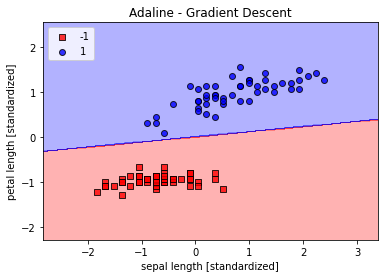

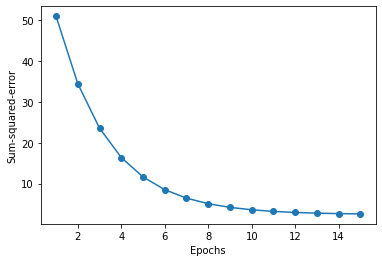

In [8]:
ada = AdalineGD(n_iter=15, eta=0.01)
ada.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.show()

plt.plot(range(1, len(ada.cost_)+1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.show()